# HACKATON 
## Importing libraries

In [228]:
import pandas as pd
import numpy as np
from  sklearn.metrics  import multilabel_confusion_matrix, f1_score
import matplotlib.pyplot as plt
import tensorflow as tf


## PREPROCESSING
the first step is importing data 

In [229]:
#Importing the dataset using pandas
dataset=pd.read_csv('train_set.csv')
dataset.head()

,Job_offer,Label
0,"Openjobmetis SpA ricerca, per importante azien...",Java Developer
1,"La persona prescelta, diplomata o laureata in ...",Software Engineer
2,Sei un informatico o matematico con la passion...,Software Engineer
3,"Ti occuperai della progettazione, realizzazion...",Programmer
4,Stiamo cercando uno\una sviluppatore\sviluppat...,Programmer


add 5 columns to the dataset to convert the label in one hot encoding

In [230]:

label_dictionary={'Java Developer':0,'Software Engineer':1,'Programmer':2,'Web Developer':3,'System Analyst':4}

dataset['Java Developer']=0
dataset['Software Engineer']=0
dataset['Programmer']=0
dataset['Web Developer']=0
dataset['System Analyst']=0
for i in range(len(dataset)):
    dataset.iloc[i,dataset.columns.get_loc(dataset['Label'][i])]=1
dataset 

,Job_offer,Label,Java Developer,Software Engineer,Programmer,Web Developer,System Analyst
0,"Openjobmetis SpA ricerca, per importante azien...",Java Developer,1,0,0,0,0
1,"La persona prescelta, diplomata o laureata in ...",Software Engineer,0,1,0,0,0
2,Sei un informatico o matematico con la passion...,Software Engineer,0,1,0,0,0
3,"Ti occuperai della progettazione, realizzazion...",Programmer,0,0,1,0,0
4,Stiamo cercando uno\una sviluppatore\sviluppat...,Programmer,0,0,1,0,0
...,...,...,...,...,...,...,...
1747,"* Test JUnit\n * Git, La Ibs Srl è alla ri...",Java Developer,1,0,0,0,0
1748,"La ricorsa, inserita all'interno di un team, l...",Programmer,0,0,1,0,0
1749,Sviluppatore Java Junior da inserire in attivi...,Java Developer,1,0,0,0,0
1750,La risorsa sarà inserita nei team di risorse d...,Web Developer,0,0,0,1,0


Divide the dataset in Label and Features

In [231]:
X=np.array(dataset[["Job_offer"]])
X=X.reshape(X.shape[0],)
Y=np.array(dataset[["Java Developer","Software Engineer","Programmer","Web Developer","System Analyst"]])
print(X.shape,Y.shape)

(1752,) (1752, 5)


we use the Tokenizer function of Tensorflow to convert the text in a sequence of numbers

In [232]:
tokenizer=tf.keras.preprocessing.text.Tokenizer(filters='!+#"$%&()*,-./:;<=>?@[\]^_`{|}~\t\n')
tokenizer.fit_on_texts(X)
X=tokenizer.texts_to_sequences(X)



we use the pad_sequence function of Tensorflow to bring all the sequences to the same length

In [233]:
mean_length=int(np.mean([len(x) for x in X]))
X_pad=tf.keras.preprocessing.sequence.pad_sequences(X,maxlen=mean_length,padding='post')
print(X_pad.shape,mean_length)

(1752, 105) 105


## MODEL BUILDING
we use the Sequential function of Tensorflow to build the model. We add 3 layers to the model:
- **Dense Layer** with a number of neurons corresponding to the number of words in the vocabulary
- **Dropout Layer** to avoid overfitting
- **Dense Layer** with a number of neurons corresponding to the number of labels

In [234]:
ClassWeight={0:0.75,1:0.5,2:1,3:0.5,4:1}

In [235]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(len(tokenizer.word_index),activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(5,activation='sigmoid'))
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='CategoricalCrossentropy',metrics=['accuracy'])
model.build(input_shape=(None,mean_length))
model.summary()#





Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 8992)              953152    
                                                                 
 dropout_36 (Dropout)        (None, 8992)              0         
                                                                 
 dense_65 (Dense)            (None, 5)                 44965     
                                                                 
Total params: 998,117
Trainable params: 998,117
Non-trainable params: 0
_________________________________________________________________


We train the model with 20 Epochs and a validation split of 0.2

In [236]:
hystory=model.fit(X_pad,Y,epochs=20,validation_split=0.2,workers=4,class_weight=ClassWeight)

Epoch 1/20


plotting the  the loss  and the validation loss of the model

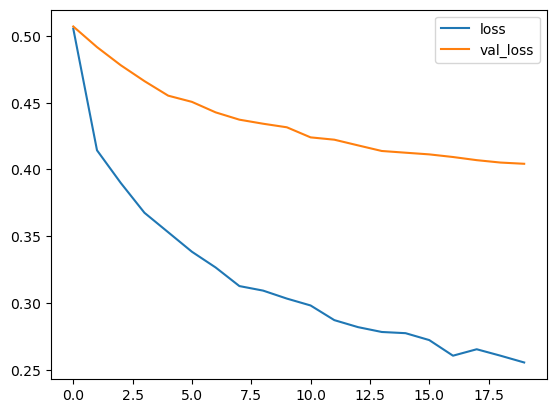

In [ ]:
plt.plot(hystory.history['loss'])
plt.plot(hystory.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

## PREDICTION AND EVALUATION


we first load and preprocess the test data

In [ ]:
#Load the test set and convert it to one hot encoding
test_set=pd.read_csv('test_set.csv')
test_set['Java Developer']=0
test_set['Software Engineer']=0
test_set['Programmer']=0
test_set['Web Developer']=0
test_set['System Analyst']=0
for i in range(len(test_set)):
    test_set.iloc[i,test_set.columns.get_loc(test_set['Label'][i])]=1 
X_test=np.array(test_set[["Job_offer"]])
X_test=X_test.reshape(X_test.shape[0],)
Y_test=np.array(test_set[["Java Developer","Software Engineer","Programmer","Web Developer","System Analyst"]])


X_test=tokenizer.texts_to_sequences(X_test)
X_test_pad=tf.keras.preprocessing.sequence.pad_sequences(X_test,maxlen=mean_length,padding='post')
print(X_test_pad.shape)


(439, 105)


we predict the labels of the test data using the model

In [ ]:

predictions=model.predict(X_test_pad)
predictions

14/14 [==============================] - 0s 14ms/step


array([[0.12290296, 0.07702309, 0.16173391, 0.05528696, 0.11274657],
       [0.6777986 , 0.05892033, 0.11367499, 0.04633841, 0.13688302],
       [0.1955931 , 0.02934039, 0.12496915, 0.0533909 , 0.28573346],
       ...,
       [0.05184781, 0.0377697 , 0.03464261, 0.9110814 , 0.04095417],
       [0.31327334, 0.01481615, 0.15213926, 0.21174407, 0.12166341],
       [0.15726097, 0.1257699 , 0.32316244, 0.07687896, 0.16543895]],
      dtype=float32)

we convert the labels in one hot encoding

In [ ]:
#F1 score on Test set

for i in range(len(predictions)):
    max_row=max(predictions[i])
    for j in range(len(predictions[i])):
        if predictions[i][j]==max_row:
            predictions[i][j]=1
        else:
            predictions[i][j]=0
prediction=np.array(predictions,dtype=int)
prediction


array([[0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

we evaluate the model using the f1 score

In [ ]:
#F1 score on Test set
f1=f1_score(Y_test,prediction,average='micro')
print(f1)



0.48519362186788156


## CONCLUSION
we convert the labels from one hot encoding into the original labels and we save the results in a csv file

In [ ]:
one_hot_dictionary={
    (1, 0, 0, 0, 0): 'Java Developer',
    (0, 1, 0, 0, 0): 'Software Engineer',
    (0, 0, 1, 0, 0): 'Programmer',
    (0, 0, 0, 1, 0): 'Web Developer',
    (0, 0, 0, 0, 1): 'System Analyst',
}
label_pred = []
for i in prediction:
    for j in prediction[i]:
        p = tuple(j)
        label_pred.append(one_hot_dictionary[p])

out = test_set[['Job_offer', 'Label']]
out.rename(columns={"Label": "Label_true"}, inplace=True)
label_pred = pd.Series(label_pred)
out['Label_pred'] = label_pred
out.to_csv('out.csv', index=False)

/tmp/ipykernel_304204/1580526353.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out.rename(columns={"Label": "Label_true"}, inplace=True)
/tmp/ipykernel_304204/1580526353.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out['Label_pred'] = label_pred
